In [ ]:
# Extraire le tableau 

import pdfplumber
import pandas as pd

with pdfplumber.open("fichier1.pdf") as pdf:
    for i, page in enumerate(pdf.pages):
        tables = page.extract_tables()
        for j, table in enumerate(tables):
            df = pd.DataFrame(table[1:], columns=table[0])
            print(f"Tableau extrait à la page {i+1}:")
            print(df)



Tableau extrait à la page 2:
                                                           Control  \
0                            Final BW per 1000 birds    kg    2135   
1                           Live broiler sales price  €/kg    1.50   
2                             Revenue per 1000 birds     €  3202.5   
3                         Feed intake per 1000 birds    kg  4006.6   
4                    Cost of additive per 1000 birds     €           
5                    Total feed cost per 1000 birds*     €  1561.8   
6  Contribution margin per 1000 birds\n(=Revenue-...     €  1640.7   
7                                 ROI per 1000 birds                 

  Digestarom® P.E.P. Difference  
0               2210      75.00  
1               1.50             
2               3315     112.50  
3             4062.1       55.5  
4               12.7             
5             1596.1       34.3  
6             1718.9       78.2  
7                6.2             


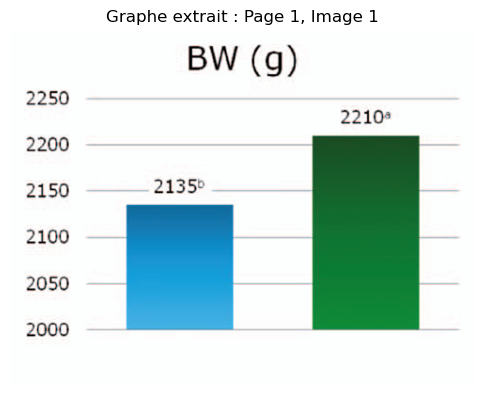

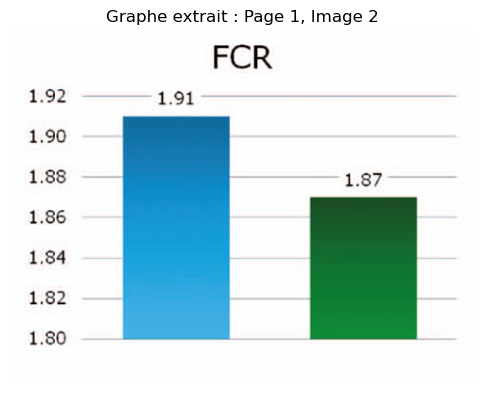

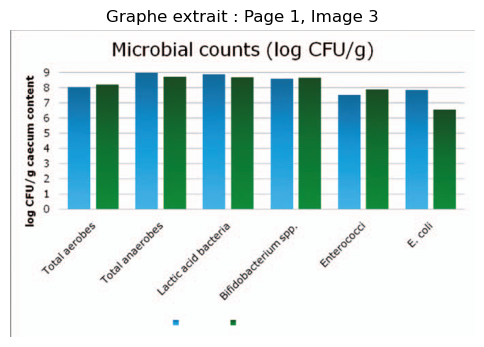

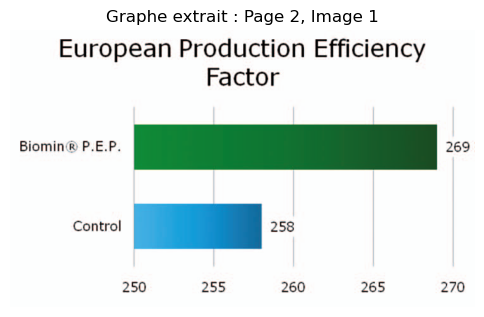

In [3]:
# Extraction des graaphes avec PyMuPDF

import fitz         # PyMuPDF
from PIL import Image
import io
import matplotlib.pyplot as plt

# Ouverture du PDF
doc = fitz.open("fichier1.pdf")

# Extraction et affichage des images
for i, page in enumerate(doc):
    images = page.get_images(full=True)
    for j, img in enumerate(images):
        xref = img[0]
        pix = fitz.Pixmap(doc, xref)

        # Si l'image n'est pas déjà en RGB, on la convertit
        if pix.colorspace is None or pix.colorspace.n > 3:
            pix = fitz.Pixmap(fitz.csRGB, pix)

        # Sauvegarde de l'image
        img_path = f"graphe_page{i+1}_{j+1}.png"
        pix.save(img_path)

        # Affichage avec matplotlib
        image = Image.open(img_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Graphe extrait : Page {i+1}, Image {j+1}")
        plt.show()

        # Libération mémoire
        pix = None

Traitement de : graphe_page1_1.png


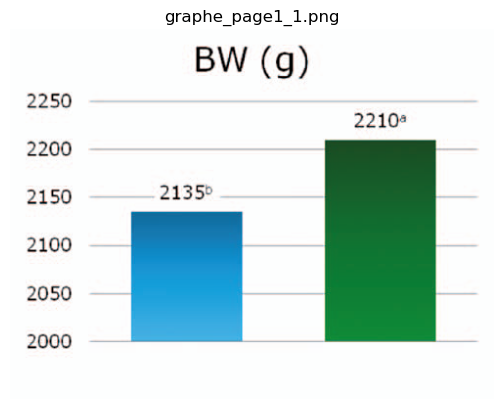

Texte brut extrait :
BW (g)

2250

22108

2200

2150

2100

2050

 

2000 ——


Tableau structuré :


,BW,(g)
0,2250,None
1,22108,None
2,2200,None
3,2150,None
4,2100,None
5,2050,None
6,2000,——


------------------------------------------------------------
Traitement de : graphe_page1_2.png


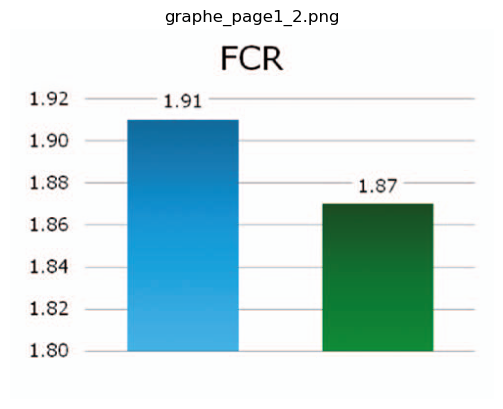

Texte brut extrait :
1.92
1.90
1.88
1.86
1.84
1.82
1.80

1.91

FCR

 

 


Tableau structuré :


,1.92
0,1.90
1,1.88
2,1.86
3,1.84
4,1.82
5,1.80
6,1.91
7,FCR


------------------------------------------------------------
Traitement de : graphe_page1_3.png


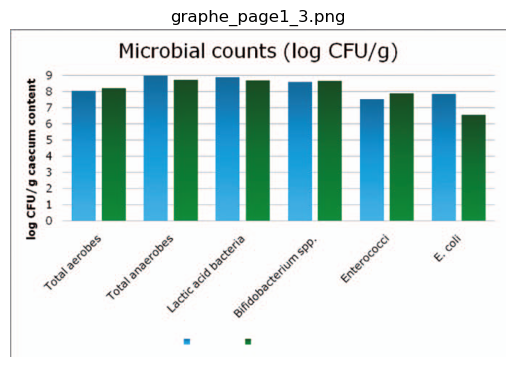

Texte brut extrait :
 

Microbial counts (log CFU/g)

 

quequos uinsee> 6/4 60}


Tableau structuré :


,Microbial,counts,(log,CFU/g)
0,quequos,uinsee>,6/4,60}


------------------------------------------------------------
Traitement de : graphe_page2_1.png


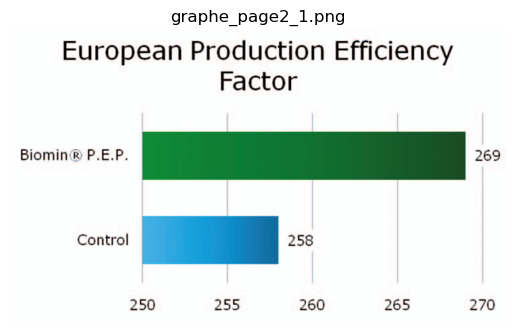

Texte brut extrait :
European Production Efficiency
Factor

ie en ri
Control 7 “i

250 255 260 265 270


Tableau structuré :


,0,1,2,3,4
0,European,Production,Efficiency,None,None
1,Factor,None,None,None,None
2,ie,en,ri,None,None
3,Control,7,“i,None,None
4,250,255,260,265,270


------------------------------------------------------------


In [4]:
from PIL import Image
import pytesseract
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour convertir le texte OCR en tableau (DataFrame)
def texte_vers_dataframe(texte):
    lignes = texte.strip().split('\n')
    lignes = [ligne for ligne in lignes if ligne.strip()]
    donnees = [ligne.split() for ligne in lignes]

    try:
        # Essaye de prendre la première ligne comme en-tête
        df = pd.DataFrame(donnees[1:], columns=donnees[0])
    except Exception:
        # Si l'entête échoue, retourne brut
        df = pd.DataFrame(donnees)

    return df

# Liste des images extraites à traiter
images_graphes = [
    "graphe_page1_1.png",
    "graphe_page1_2.png",
    "graphe_page1_3.png",
    "graphe_page2_1.png"
]

# Parcours de chaque image
for img_name in images_graphes:
    print(f"Traitement de : {img_name}")

    # Affichage de l'image
    image = Image.open(img_name)
    plt.imshow(image)
    plt.axis('off')
    plt.title(img_name)
    plt.show()

    # OCR avec Tesseract
    texte = pytesseract.image_to_string(image, lang='eng')

    # Affichage du texte brut
    print("Texte brut extrait :")
    print(texte)
    print()

    # Conversion en tableau
    df = texte_vers_dataframe(texte)
    
    print("Tableau structuré :")
    display(df)
    print("-" * 60)


In [5]:
# Tradiure le texte du fichier1 et traaduire en tableau

import fitz  # PyMuPDF
import pandas as pd

# Fonction pour convertir du texte brut en DataFrame
def texte_vers_dataframe(texte):
    lignes = texte.strip().split('\n')
    lignes = [ligne for ligne in lignes if ligne.strip()]
    donnees = [ligne.split() for ligne in lignes]

    try:
        df = pd.DataFrame(donnees[1:], columns=donnees[0])
    except Exception:
        df = pd.DataFrame(donnees)

    return df

# Ouvrir le PDF
doc = fitz.open("fichier1.pdf")

# Parcourir les pages
for i, page in enumerate(doc):
    print(f"\n--- Texte extrait de la page {i+1} ---")
    texte = page.get_text()
    print(texte)

    # Essayer de structurer en tableau
    df = texte_vers_dataframe(texte)
    
    print("\n--- Tableau structuré ---")
    display(df)


--- Texte extrait de la page 1 ---
Product line
  
All birds were subjected to three feeding phases: Starter (day 1 – 21), grower (day 22 – 35), finisher (d 36 – 42). At the 
end of the trial (42 days), 8 broilers from each group were slaughtered and samples of jejnum were taken for determi-
nation of villus height, villus width, crypt depth and thickness of tunica muscularis. Samples of caecal contents were 
subjected to microbiological analysis of the gut microflora.
Data were analyzed by ANOVA/ MANOVA followed by LSD post hoc test using StatSoft software (STATISTICA 8).
Results and Discussion
Final body weight and feed conversion ratio (FCR) are shown in Figures 1 and 2. Performance parameters were 
improved when the diets were supplemented with Digestarom® P.E.P. Final body weight at 42 days of age was signi-
ficantly (P<0.05) higher by 3.5% and FCR was 2.1 % lower as compared to the Control group. Intestinal evaluation 
of the microflora indicated that there was a numerical (P>0.

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,Product,line,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,All,birds,were,subjected,to,three,feeding,phases:,Starter,(day,...,22,–,"35),",finisher,(d,36,–,42).,At,the
2,end,of,the,trial,(42,"days),",8,broilers,from,each,...,of,jejnum,were,taken,for,determi-,None,None,None,None
3,nation,of,villus,"height,",villus,"width,",crypt,depth,and,thickness,...,caecal,contents,were,None,None,None,None,None,None,None
4,subjected,to,microbiological,analysis,of,the,gut,microflora.,None,None,...,None,None,None,None,None,None,None,None,None,None
5,Data,were,analyzed,by,ANOVA/,MANOVA,followed,by,LSD,post,...,(STATISTICA,8).,None,None,None,None,None,None,None,None
6,Results,and,Discussion,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,Final,body,weight,and,feed,conversion,ratio,(FCR),are,shown,...,Performance,parameters,were,None,None,None,None,None,None,None
8,improved,when,the,diets,were,supplemented,with,Digestarom®,P.E.P.,Final,...,of,age,was,signi-,None,None,None,None,None,None
9,ficantly,(P<0.05),higher,by,3.5%,and,FCR,was,2.1,%,...,Control,group.,Intestinal,evaluation,None,None,None,None,None,None



--- Texte extrait de la page 2 ---
Crypt depth was increased (P<0.05) in birds fed phytogenics. Villus height and width did not differ significantly bet-
ween treatments. These results indicate that phytogenics affect gut morphology, which might add to the positive effects 
on performance parameters.
The financial calculation below is based on 1000 birds and local prices for feed and live broilers. The figures show 
an economic benefit of using the phytogenic feed additive under the conditions of the trial. Compared to the Control, 
supplementation of the feed with Digestarom® P.E.P. created an additional profit, resulting in a Return on Investment 
(ROI) of 6.2.
Control
Digestarom®  P.E.P. 
Difference
Final BW per 1000 birds
kg
2135
2210
75.00
Live broiler sales price
€/kg
1.50
1.50
Revenue per 1000 birds
€
3202.5
3315
112.50
Feed intake per 1000 birds
kg
4006.6 
4062.1 
55.5 
Cost of additive per 1000 birds
€
12.7
Total feed cost per 1000 birds* 
€
1561.8 
1596.1 
34.3 
Contribution

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Crypt,depth,was,increased,(P<0.05),in,birds,fed,phytogenics.,Villus,height,and,width,did,not,differ,significantly,bet-,None,None
1,ween,treatments.,These,results,indicate,that,phytogenics,affect,gut,"morphology,",which,might,add,to,the,positive,effects,None,None,None
2,on,performance,parameters.,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,The,financial,calculation,below,is,based,on,1000,birds,and,local,prices,for,feed,and,live,broilers.,The,figures,show
4,an,economic,benefit,of,using,the,phytogenic,feed,additive,under,the,conditions,of,the,trial.,Compared,to,the,"Control,",None
5,supplementation,of,the,feed,with,Digestarom®,P.E.P.,created,an,additional,"profit,",resulting,in,a,Return,on,Investment,None,None,None
6,(ROI),of,6.2.,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,Control,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8,Digestarom®,P.E.P.,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9,Difference,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Chargement du dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Affichage rapide du dataset en DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].apply(lambda i: target_names[i])
display(df.head())

# Division des données en train et test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = knn.predict(X_test)

# Évaluation du modèle
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report :")
print(classification_report(y_test, y_pred, target_names=target_names))

# Affichage de quelques prédictions
resultats = pd.DataFrame({
    "Vrai": [target_names[i] for i in y_test],
    "Prédit": [target_names[i] for i in y_pred]
})
display(resultats.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Accuracy : 1.0

Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,Vrai,Prédit
0,versicolor,versicolor
1,setosa,setosa
2,virginica,virginica
3,versicolor,versicolor
4,versicolor,versicolor


In [2]:
import pandas as pd

# Charger le fichier Excel
df = pd.read_excel("employes_dataset.xlsx")

# Afficher les noms des colonnes
print("Colonnes du dataset :")
print(df.columns.tolist())

# Supprimer uniquement les lignes avec des NaN dans les autres colonnes autres que 'Télétravail (%)'
df_clean = df[df.drop(columns=["Télétravail (%)"]).notnull().all(axis=1)]

# Afficher la taille du dataset après suppression
print("Dimensions après nettoyage :", df_clean.shape)

# Vérifier les valeurs manquantes restantes
print("\nValeurs manquantes restantes (devrait être uniquement dans 'Télétravail (%)') :")
print(df_clean.isnull().sum())

# Enregistrer le nouveau fichier
df_clean.to_csv("donnees_nettoyees.csv", index=False)


Colonnes du dataset :
['ID', 'Nom', 'Prénom', 'Âge', 'Sexe', 'Email', 'Pays', 'Ville', 'Salaire (€)', "Date d'embauche", 'Département', 'Télétravail (%)', 'Performance (Note)']
Dimensions après nettoyage : (948, 13)

Valeurs manquantes restantes (devrait être uniquement dans 'Télétravail (%)') :
ID                     0
Nom                    0
Prénom                 0
Âge                    0
Sexe                   0
Email                  0
Pays                   0
Ville                  0
Salaire (€)            0
Date d'embauche        0
Département            0
Télétravail (%)       49
Performance (Note)     0
dtype: int64
